<a href="https://colab.research.google.com/github/AntonioYoma96/vehicle_detector_yolo/blob/main/Conteo_yolov8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Nos aseguramos de estar utilizando una GPU

In [ ]:
!nvidia-smi

Wed Dec 20 19:00:29 2023       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   40C    P8               9W /  70W |      0MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

##Redimensionar video a 3840 x 2160 px (El código trabaja con ese tamaño de video)

In [ ]:
import cv2
from google.colab import files

def obtener_tamano_video(ruta_video):
    cap = cv2.VideoCapture(ruta_video)
    ancho = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
    alto = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))
    cap.release()
    return ancho, alto

def redimensionar_video(ruta_video_entrada, ruta_video_salida, nuevo_tamano):
    cap = cv2.VideoCapture(ruta_video_entrada)
    fps = cap.get(cv2.CAP_PROP_FPS)  # Obtener la frecuencia de cuadros por segundo (FPS)
    fourcc = cv2.VideoWriter_fourcc(*'mp4v')  # o el formato deseado
    out = cv2.VideoWriter(ruta_video_salida, fourcc, fps, nuevo_tamano)

    while True:
        ret, frame = cap.read()
        if not ret:
            break

        frame_redimensionado = cv2.resize(frame, nuevo_tamano)
        out.write(frame_redimensionado)

    cap.release()
    out.release()
    cv2.destroyAllWindows()

# Ruta del video de entrada
ruta_video_entrada = "/content/traffic1.mp4"

# Obtener el tamaño del video de entrada
tamano_video_entrada = obtener_tamano_video(ruta_video_entrada)

print("Tamaño del video de entrada:", tamano_video_entrada)

# Tamaño deseado para el video de salida
nuevo_tamano = (3840, 2160)

# Ruta del video de salida redimensionado
ruta_video_salida_redimensionado = "/content/video_redimensionado.mp4"

# Redimensionar el video
redimensionar_video(ruta_video_entrada, ruta_video_salida_redimensionado, nuevo_tamano)

# Obtener el tamaño del video de salida
tamano_video_salida = obtener_tamano_video(ruta_video_salida_redimensionado)

print("Tamaño del video de salida:", tamano_video_salida)

# Descargar el video redimensionado
files.download(ruta_video_salida_redimensionado)


Tamaño del video de entrada: (1920, 1080)
Tamaño del video de salida: (3840, 2160)


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

##Asociamos a la variable HOME el directorio principal (content)

In [ ]:
import os
HOME = os.getcwd()
print(HOME)

/content


##Descargamos un video de prueba (no suelo ejecutar este codigo, ya que tengo mi propio video en local).

In [ ]:
%cd {HOME}
!wget --load-cookies /tmp/cookies.txt "https://docs.google.com/uc?export=download&confirm=$(wget --quiet --save-cookies /tmp/cookies.txt --keep-session-cookies --no-check-certificate 'https://docs.google.com/uc?export=download&id=1pz68D1Gsx80MoPg-_q-IbEdESEmyVLm-' -O- | sed -rn 's/.*confirm=([0-9A-Za-z_]+).*/\1\n/p')&id=1pz68D1Gsx80MoPg-_q-IbEdESEmyVLm-" -O vehicle-counting.mp4 && rm -rf /tmp/cookies.txt


/content
--2023-12-18 20:17:55--  https://docs.google.com/uc?export=download&confirm=&id=1pz68D1Gsx80MoPg-_q-IbEdESEmyVLm-
Resolving docs.google.com (docs.google.com)... 108.177.111.100, 108.177.111.102, 108.177.111.113, ...
Connecting to docs.google.com (docs.google.com)|108.177.111.100|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://doc-0s-ag-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/vn08ae78dpba5nj7cet9ue3shk19dkbh/1702930650000/04309230031174164349/*/1pz68D1Gsx80MoPg-_q-IbEdESEmyVLm-?e=download&uuid=19b5e3c4-348f-4866-b796-f63ea3c4e254 [following]
--2023-12-18 20:17:56--  https://doc-0s-ag-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/vn08ae78dpba5nj7cet9ue3shk19dkbh/1702930650000/04309230031174164349/*/1pz68D1Gsx80MoPg-_q-IbEdESEmyVLm-?e=download&uuid=19b5e3c4-348f-4866-b796-f63ea3c4e254
Resolving doc-0s-ag-docs.googleusercontent.com (doc-0s-ag-docs.googleusercontent.com)... 64.2

##Creamos la ruta para el video final del conteo

In [ ]:
SOURCE_VIDEO_PATH = f"{HOME}//traffic_final.mp4"

##Instalamos la biblioteca ultralytics, la que nos ufrece funcionalidades para utilizar el modelo Yolo entrenado con mi propio conjunto de datos en este caso

In [ ]:
# Pip install method (recommended)

!pip install ultralytics

from IPython import display
display.clear_output()

import ultralytics
ultralytics.checks()

Ultralytics YOLOv8.0.228 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 26.5/78.2 GB disk)


##Se clona el repositorio de BiteTrack, el que realizará el tracking de los vehículos. Además se descargan todas las dependencias para su correcto funcionamiento

In [ ]:
%cd {HOME}
!git clone https://github.com/ifzhang/ByteTrack.git
%cd {HOME}/ByteTrack

# workaround related to https://github.com/roboflow/notebooks/issues/80
!sed -i 's/onnx==1.8.1/onnx==1.9.0/g' requirements.txt

!pip3 install -q -r requirements.txt
!python3 setup.py -q develop
!pip install -q cython_bbox
!pip install -q onemetric
# workaround related to https://github.com/roboflow/notebooks/issues/112 and https://github.com/roboflow/notebooks/issues/106
!pip install -q loguru lap thop

from IPython import display
display.clear_output()


import sys
sys.path.append(f"{HOME}/ByteTrack")


import yolox
print("yolox.__version__:", yolox.__version__)

yolox.__version__: 0.1.0


##Se ingresn valores para los atributos de la clase BYTETrackerArgs como umbral de confianza, área mínima de la caja delimitadora para mantener el seguimiento, entre otros.

In [ ]:
from yolox.tracker.byte_tracker import BYTETracker, STrack
from onemetric.cv.utils.iou import box_iou_batch
from dataclasses import dataclass


@dataclass(frozen=True)
class BYTETrackerArgs:
    track_thresh: float = 0.25    #Umbral de confianza para el seguimiento
    track_buffer: int = 30    #Número máximo de cuadros para los que se mantiene el seguimiento sin ninguna detección
    match_thresh: float = 0.8   #Umbral de coincidencia para asociar detecciones con objetos rastreados
    aspect_ratio_thresh: float = 3.0    #Umbral para filtrar objetos rastreados según la relación de aspecto
    min_box_area: float = 1.0   #Área mínima de la caja delimitadora para mantener el seguimiento
    mot20: bool = False   #Indicador booleano para especificar si se está utilizando el conjunto de datos MOT20

##Se instala la librería supervision, la que proporciona múltiples funcionalidades para la visión por computadora como la manipulación de los frames, anotaciones en las detecciones, etc.

In [ ]:
!pip install supervision==0.1.0


from IPython import display
display.clear_output()


import supervision
print("supervision.__version__:", supervision.__version__)

supervision.__version__: 0.1.0


##Se importan clases y utilidades de la librería supervision, como generadores de frames, paleta de colores, etiquetado en los bounding boxes, entre otros.

In [ ]:
from supervision.draw.color import ColorPalette
from supervision.geometry.dataclasses import Point
from supervision.video.dataclasses import VideoInfo
from supervision.video.source import get_video_frames_generator
from supervision.video.sink import VideoSink
from supervision.notebook.utils import show_frame_in_notebook
from supervision.tools.detections import Detections, BoxAnnotator
from supervision.tools.line_counter import LineCounter, LineCounterAnnotator

##Realiza la asociación de detecciones con pistas (track) en función de la superposición IoU, asignando a cada detección el identificador de la pista con la que tiene la mayor superposición.

In [ ]:
from typing import List

import numpy as np


# converts Detections into format that can be consumed by match_detections_with_tracks function
def detections2boxes(detections: Detections) -> np.ndarray:
    return np.hstack((
        detections.xyxy,
        detections.confidence[:, np.newaxis]
    ))


# converts List[STrack] into format that can be consumed by match_detections_with_tracks function
def tracks2boxes(tracks: List[STrack]) -> np.ndarray:
    return np.array([
        track.tlbr
        for track
        in tracks
    ], dtype=float)


# matches our bounding boxes with predictions
def match_detections_with_tracks(
    detections: Detections,
    tracks: List[STrack]
) -> Detections:
    if not np.any(detections.xyxy) or len(tracks) == 0:
        return np.empty((0,))

    tracks_boxes = tracks2boxes(tracks=tracks)
    iou = box_iou_batch(tracks_boxes, detections.xyxy)
    track2detection = np.argmax(iou, axis=1)

    tracker_ids = [None] * len(detections)

    for tracker_index, detection_index in enumerate(track2detection):
        if iou[tracker_index, detection_index] != 0:
            tracker_ids[detection_index] = tracks[tracker_index].track_id

    return tracker_ids

##Instanciamos un objeto de la clase YOLO y le asignamos un modelo previamente entrenado con mi conjunto de datos personalizado

In [ ]:
# settings
MODEL = "/content/best_50_epocas.pt"

In [ ]:
from ultralytics import YOLO

model = YOLO(MODEL)
#model.fuse()

In [ ]:
# dict maping class_id to class_name
CLASS_NAMES_DICT = model.model.names
# class_ids of interest - car, motorcycle, bus and truck
CLASS_ID = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]

## Se carga un fotograma del video, realiza una predicción de detección de objetos usando el modelo YOLOv8, convierte las predicciones a un formato específico de Supervisión, anota el fotograma con las detecciones y etiquetas, y finalmente, muestra el fotograma anotado.


0: 384x640 2 cars, 1 truck-m-, 199.0ms
Speed: 6.7ms preprocess, 199.0ms inference, 2.0ms postprocess per image at shape (1, 3, 384, 640)


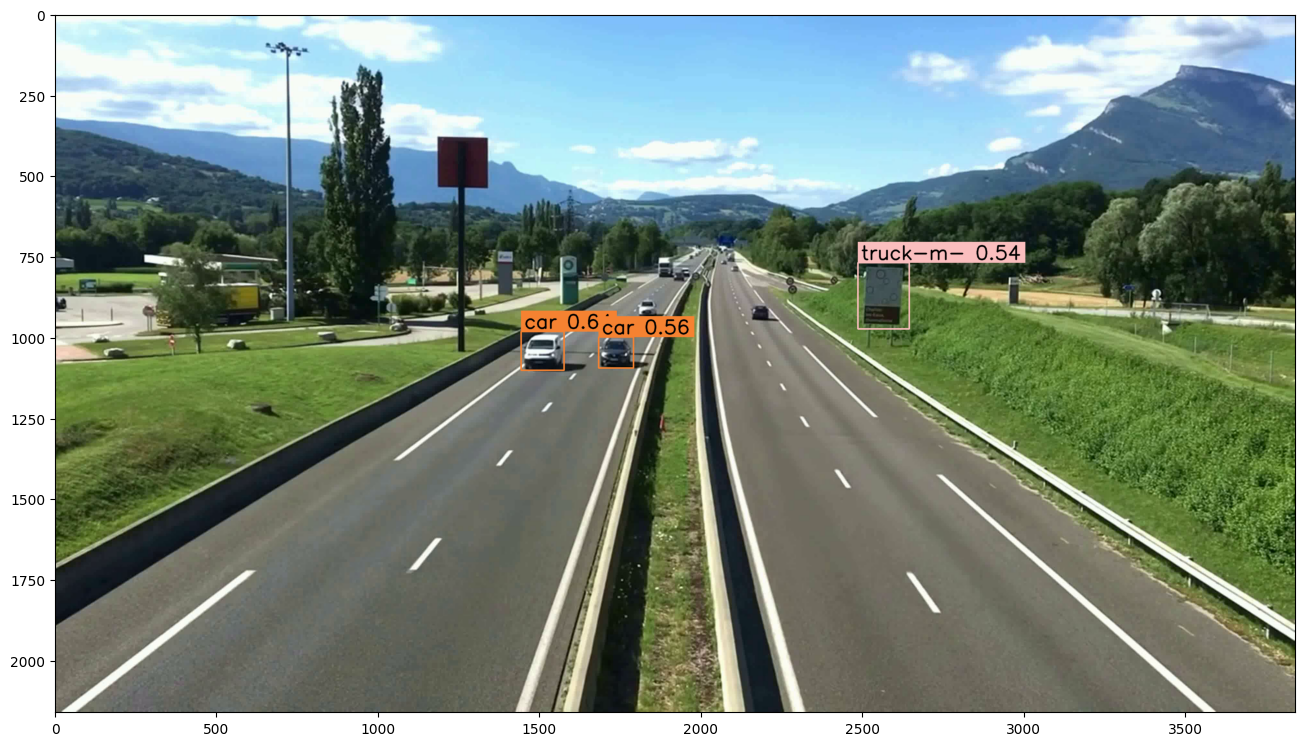

In [ ]:
# create frame generator
generator = get_video_frames_generator(SOURCE_VIDEO_PATH)
# create instance of BoxAnnotator
box_annotator = BoxAnnotator(color=ColorPalette(), thickness=4, text_thickness=4, text_scale=2)
# acquire first video frame
iterator = iter(generator)
frame = next(iterator)
# model prediction on single frame and conversion to supervision Detections
results = model(frame)
detections = Detections(
    xyxy=results[0].boxes.xyxy.cpu().numpy(),
    confidence=results[0].boxes.conf.cpu().numpy(),
    class_id=results[0].boxes.cls.cpu().numpy().astype(int)
)
# format custom labels
labels = [
    f"{CLASS_NAMES_DICT[class_id]} {confidence:0.2f}"
    for _, confidence, class_id, tracker_id
    in detections
]
# annotate and display frame
frame = box_annotator.annotate(frame=frame, detections=detections, labels=labels)

%matplotlib inline
show_frame_in_notebook(frame, (16, 16))

##Los puntos de inicio y fin de la linea que servirá para el conteo de vehículos. Además, se crea la ruta del video resultante.

In [ ]:
# settings
LINE_START = Point(50, 1500)
LINE_END = Point(3840-50, 1500)

TARGET_VIDEO_PATH = f"{HOME}/vehicle_counting-result.mp4"

In [ ]:
VideoInfo.from_video_path(SOURCE_VIDEO_PATH)

VideoInfo(width=3840, height=2160, fps=29, total_frames=1025)

##Se utilizan las detecciones como entrada para el tracker BYTETracker, que actualiza el seguimiento de objetos en el fotograma actual. Se crea una instancia de LineCounter para contar los vehículos que cruzan esa linea, se agregan anotaciones visuales con BoxAnnotator y LineCounterAnnotator.

In [ ]:
from tqdm.notebook import tqdm


# create BYTETracker instance
byte_tracker = BYTETracker(BYTETrackerArgs())
# create VideoInfo instance
video_info = VideoInfo.from_video_path(SOURCE_VIDEO_PATH)
# create frame generator
generator = get_video_frames_generator(SOURCE_VIDEO_PATH)
# create LineCounter instance
line_counter = LineCounter(start=LINE_START, end=LINE_END)
# create instance of BoxAnnotator and LineCounterAnnotator
box_annotator = BoxAnnotator(color=ColorPalette(), thickness=4, text_thickness=4, text_scale=2)
line_annotator = LineCounterAnnotator(thickness=4, text_thickness=4, text_scale=2)

# open target video file
with VideoSink(TARGET_VIDEO_PATH, video_info) as sink:
    # loop over video frames
    for frame in tqdm(generator, total=video_info.total_frames):
        # model prediction on single frame and conversion to supervision Detections
        results = model(frame)
        detections = Detections(
            xyxy=results[0].boxes.xyxy.cpu().numpy(),
            confidence=results[0].boxes.conf.cpu().numpy(),
            class_id=results[0].boxes.cls.cpu().numpy().astype(int)
        )
        # filtering out detections with unwanted classes
        mask = np.array([class_id in CLASS_ID for class_id in detections.class_id], dtype=bool)
        detections.filter(mask=mask, inplace=True)
        # tracking detections
        tracks = byte_tracker.update(
            output_results=detections2boxes(detections=detections),
            img_info=frame.shape,
            img_size=frame.shape
        )
        tracker_id = match_detections_with_tracks(detections=detections, tracks=tracks)
        detections.tracker_id = np.array(tracker_id)
        # filtering out detections without trackers
        mask = np.array([tracker_id is not None for tracker_id in detections.tracker_id], dtype=bool)
        detections.filter(mask=mask, inplace=True)
        # format custom labels
        labels = [
            f"#{tracker_id} {CLASS_NAMES_DICT[class_id]} {confidence:0.2f}"
            for _, confidence, class_id, tracker_id
            in detections
        ]
        # updating line counter
        line_counter.update(detections=detections)
        # annotate and display frame
        frame = box_annotator.annotate(frame=frame, detections=detections, labels=labels)
        line_annotator.annotate(frame=frame, line_counter=line_counter)
        sink.write_frame(frame)

  0%|          | 0/1025 [00:00<?, ?it/s]


0: 384x640 2 cars, 1 truck-m-, 62.4ms
Speed: 4.1ms preprocess, 62.4ms inference, 2.3ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 2 cars, 1 truck-m-, 61.9ms
Speed: 3.9ms preprocess, 61.9ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 2 cars, 1 truck-m-, 61.9ms
Speed: 3.4ms preprocess, 61.9ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 big truck, 3 cars, 1 truck-m-, 62.3ms
Speed: 3.4ms preprocess, 62.3ms inference, 2.9ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 big truck, 3 cars, 1 truck-m-, 58.3ms
Speed: 3.7ms preprocess, 58.3ms inference, 2.4ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 big truck, 2 cars, 1 truck-m-, 53.8ms
Speed: 4.2ms preprocess, 53.8ms inference, 3.4ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 big truck, 3 cars, 1 truck-m-, 52.9ms
Speed: 3.7ms preprocess, 52.9ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 6

##Solo he usado esto para quitarle los 2 segundos iniciales al video

In [ ]:
import cv2
from google.colab import files

def cortar_y_guardar_video(ruta_video_entrada, ruta_video_salida, inicio_segundo):
    cap = cv2.VideoCapture(ruta_video_entrada)

    # Obtener la frecuencia de cuadros por segundo (FPS) y el tamaño del video
    fps = cap.get(cv2.CAP_PROP_FPS)
    tamano = (int(cap.get(cv2.CAP_PROP_FRAME_WIDTH)), int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT)))

    # Calcular el número total de cuadros en el video
    total_cuadros = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))

    # Calcular el cuadro de inicio en base al segundo deseado
    cuadro_inicio = int(fps * inicio_segundo)

    # Crear el objeto VideoWriter para escribir el nuevo video
    fourcc = cv2.VideoWriter_fourcc(*'mp4v')  # o el formato deseado
    out = cv2.VideoWriter(ruta_video_salida, fourcc, fps, tamano)

    # Ir al cuadro de inicio
    cap.set(cv2.CAP_PROP_POS_FRAMES, cuadro_inicio)

    # Leer y escribir los cuadros restantes
    while True:
        ret, frame = cap.read()
        if not ret:
            break

        out.write(frame)

    cap.release()
    out.release()
    cv2.destroyAllWindows()

# Ruta del video de entrada
ruta_video_entrada = "/content/video_redimensionado.mp4"

# Ruta del video de salida cortado
ruta_video_salida_cortado = "/content/traffic_final.mp4"

# Segundo de inicio para el corte
segundo_inicio = 2

# Cortar y guardar el video
cortar_y_guardar_video(ruta_video_entrada, ruta_video_salida_cortado, segundo_inicio)

# Descargar el video cortado
files.download(ruta_video_salida_cortado)


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>